<a href="https://colab.research.google.com/github/alexlopespereira/mba_enap/blob/main/CD/Atividades/Aula0_Atividades.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 0 - Atividade


In [1]:
import pandas as pd
import seaborn as sns


## Atividade 0.1
### Considere o seguinte dataset

In [2]:
url='https://docs.google.com/spreadsheets/d/16B0uAFH1hubqvXytaxEkh9J8fXAJugYi/edit?usp=sharing'
url2='https://drive.google.com/uc?id=' + url.split('/')[-2]
df_orders = pd.read_excel(url2, sheet_name='Orders')
df_orders.head()

,ProductID,ProductName,Price,OrderID,CustomerID,EmployeeID,OrderDate,ShipperID,OrderDetailID,Quantity,FirstName,LastName,CategoryID,CategoryName
0,11,Queso Cabrales,21.00,10248,90,5,1996-07-04,3,1,12,Steven,Buchanan,4,Dairy Products
1,42,Singaporean Hokkien Fried Mee,14.00,10248,90,5,1996-07-04,3,2,10,Steven,Buchanan,5,Grains/Cereals
2,72,Mozzarella di Giovanni,34.80,10248,90,5,1996-07-04,3,3,5,Steven,Buchanan,4,Dairy Products
3,14,Tofu,23.25,10249,81,6,1996-07-05,1,4,9,Michael,Suyama,7,Produce
4,51,Manjimup Dried Apples,53.00,10249,81,6,1996-07-05,1,5,40,Michael,Suyama,7,Produce



#### Usando o plotnine, trace um gráfico temporal (de linha) com o faturamento/venda ($) total de cada categoria desta tabela. Pense em qual a escala temporal mais apropriada para analisar os dados. Diario? Semanal? Mensal?


In [3]:
from plotnine import (
    ggplot,
    aes,
    geom_line,
    labs,
    scale_x_datetime
)

# Calculate total price for each order detail
df_orders['TotalPrice'] = df_orders['Price'] * df_orders['Quantity']

# Extract month and year from OrderDate
df_orders['OrderMonth'] = df_orders['OrderDate'].dt.to_period('M')

# Group by month and category and sum total price
df_monthly_revenue = df_orders.groupby(['OrderMonth', 'CategoryName'])['TotalPrice'].sum().reset_index()

# Convert 'OrderMonth' back to datetime for plotting
df_monthly_revenue['OrderMonth'] = df_monthly_revenue['OrderMonth'].dt.to_timestamp()

display(df_monthly_revenue.head())

,OrderMonth,CategoryName,TotalPrice
0,1996-07-01,Beverages,4297.50
1,1996-07-01,Condiments,2731.70
2,1996-07-01,Confections,7834.75
3,1996-07-01,Dairy Products,9231.70
4,1996-07-01,Grains/Cereals,1609.50


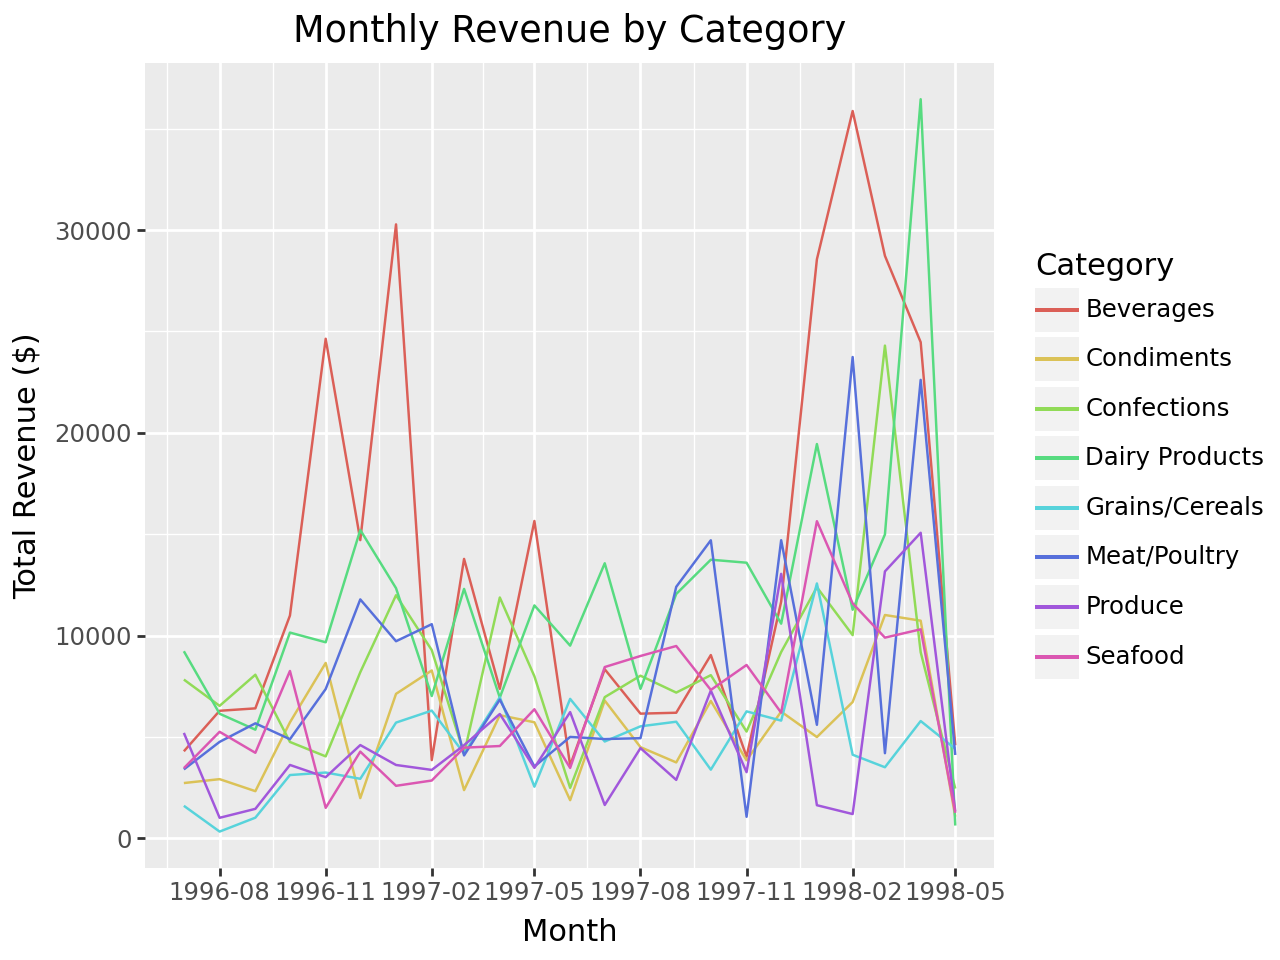

In [5]:
# Create the line plot
plot = (
    ggplot(df_monthly_revenue, aes(x='OrderMonth', y='TotalPrice', color='CategoryName'))
    + geom_line()
    + labs(title='Monthly Revenue by Category', x='Month', y='Total Revenue ($)', color='Category')
    + scale_x_datetime(date_breaks='3 months', date_labels='%Y-%m') # Adjust date breaks and labels for better readability
)

# Display the plot
plot

## Atividade 0.2

### Faça uma query para contabilizar, por UF do estabelecimento de vacinação e vacina, quantas pessoas não tomaram a segunda dose da vacina contra a COVID-19 e o prazo para tomá-la já expirou.
#### Considere que o prazo para tomar a 2a dose da Coronavac é 30 dias, e o prazo para tomar a 2a dose da Pfizer e da Astrazeneca é 90 dias.
#### Você vai precisar informar um project id criado por você na GCP, conforme explicado na aula. Replico aqui os links de tutoriais

> Use o [Cloud Resource Manager](https://console.cloud.google.com/cloud-resource-manager) para **criar um projeto na Google Cloud Platform (GCP)**, se você ainda não tem um.
>
> [Habilite as APIs do BigQuery](https://console.cloud.google.com/flows/enableapi?apiid=bigquery) para o projeto.


##### Dica 1: Esta é uma tabela que guarda transações, e não entidades
##### Dica 2: Limite suas queries ao estado do Acre para não acabar com a sua cota do sandbox.
##### Dica 3: **Faça primeiro a query funcionar no editor de SQL do bigquery** e depois coloque o código aqui. Por que?
##### Obs.: As atividades práticas da próxima aula serão outras. Não haverá tempo na próxima aula para resolver esse exercício. Apenas, será apresentada a solução. Se quiser tentar fazer sozinho, tente antes da próxima aula.

In [ ]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

### Atividade 0.3
Faça um gráfico de barras contendo esta informação. Não precisa carregar todos os dados da tabela, por simplicidade e economia de quota, plote um extrato menor apenas para demonstrar o conceito.

In [ ]:
select sum( CASE
            WHEN vagg.vacina='86' THEN
                       case when (DATE_DIFF(current_date, vagg.data_aplicacao, day) > 30) then 1 else 0 end
            ELSE
	      case when (DATE_DIFF(current_date, vagg.data_aplicacao, day) > 90) then 1 else 0 end
            END ) AS naotomou2aDose
           , vagg.sigla_uf, vagg.vacina
from `basedosdados.br_ms_vacinacao_covid19.microdados_vacinacao`  vagg
where vagg.id_paciente in
(   SELECT distinct(v.id_paciente)
    FROM `basedosdados.br_ms_vacinacao_covid19.microdados_vacinacao` v
    WHERE v.vacina != '88'
    GROUP BY v.id_paciente
    HAVING min(v.data_aplicacao) = max(v.data_aplicacao)   )
group by sigla_uf, vacina
limit 2;